In [3]:
from maxentnuc.analysis.mei_analyzer import MEIAnalyzer
from neighbor_balance.plotting import ContactMap, parse_region, format_ticks, apply_matplotlib_style, stylize_gene_name
import matplotlib.pyplot as plt
import numpy as np
from cooltools.api.insulation import _insul_diamond_dense
apply_matplotlib_style()

mei_runs = '/orcd/data/binz/001/joepaggi/mei_runs'
main_names = ['nanog', 'sox2', 'fbn2', 'klf1', 'ppm1g']

stylized_names = {name: stylize_gene_name(name) for name in main_names}
stylized_names['ppm1g_rad21_aid'] = stylize_gene_name('ppm1g') + ' ' + stylize_gene_name('rad21') + ' AID'
stylized_names['ppm1g_ice'] = stylize_gene_name('ppm1g') + ' ICE'
stylized_names['packing domains'] = 'Packing domains'
stylized_names

prod = {
    'nanog': {'config': f'{mei_runs}/nanog/v36/config.yaml', 'iteration': 18},
    'klf1': {'config': f'{mei_runs}/klf1/v3/config.yaml', 'iteration': 11},
    'ppm1g': {'config': f'{mei_runs}/ppm1g/v2/config.yaml', 'iteration': 10},
    'ppm1g_ice': {'config': f'{mei_runs}/ppm1g/v3/config.yaml', 'iteration': 12},
    'ppm1g_rad21_aid': {'config': f'{mei_runs}/ppm1g/v4/config.yaml', 'iteration': 24},
    'sox2': {'config': f'{mei_runs}/sox2/v11/config.yaml', 'iteration': 13},
    'fbn2' : {'config': f'{mei_runs}/fbn2/v2/config.yaml', 'iteration': 12},
}

for name in prod:
    prod[name]['mei'] = MEIAnalyzer(prod[name]['config'], scale=0.1)

Analyzing nanog...


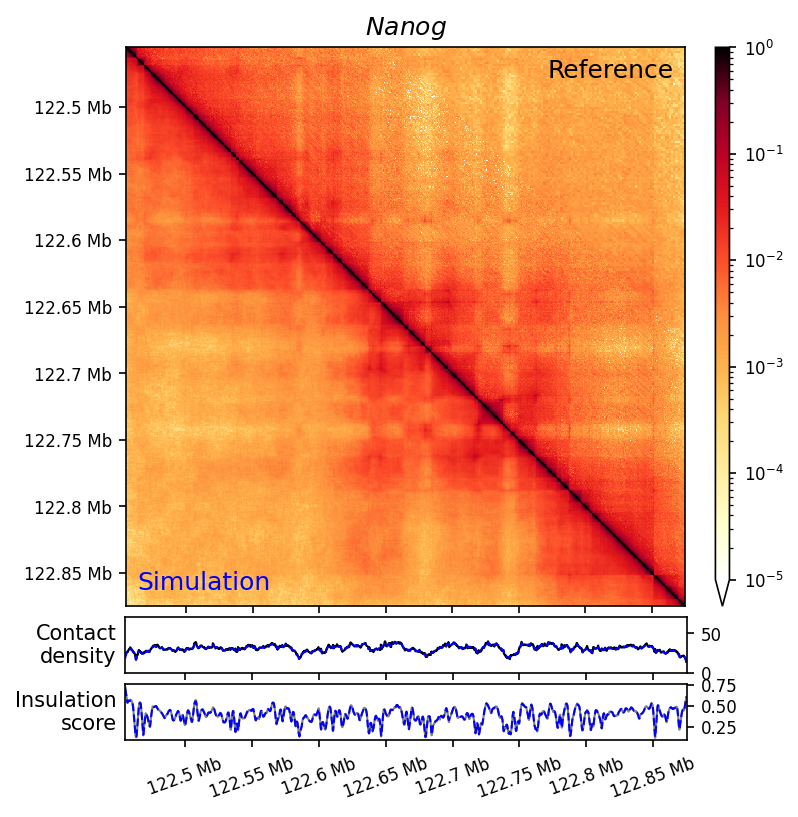

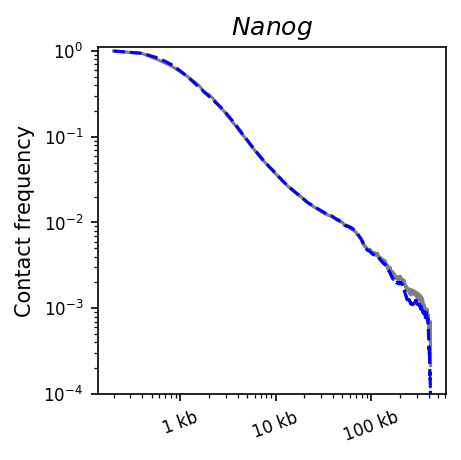

Analyzing klf1...


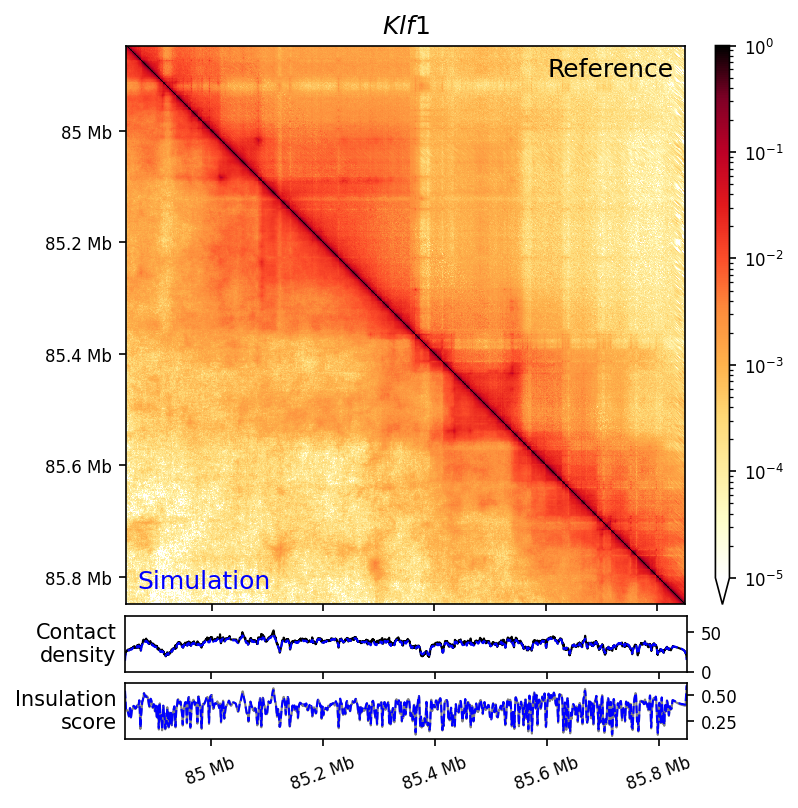

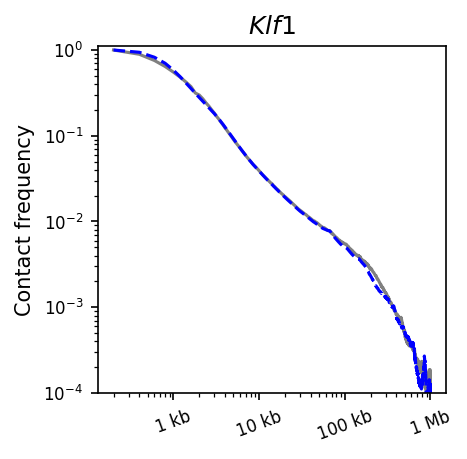

Analyzing ppm1g...


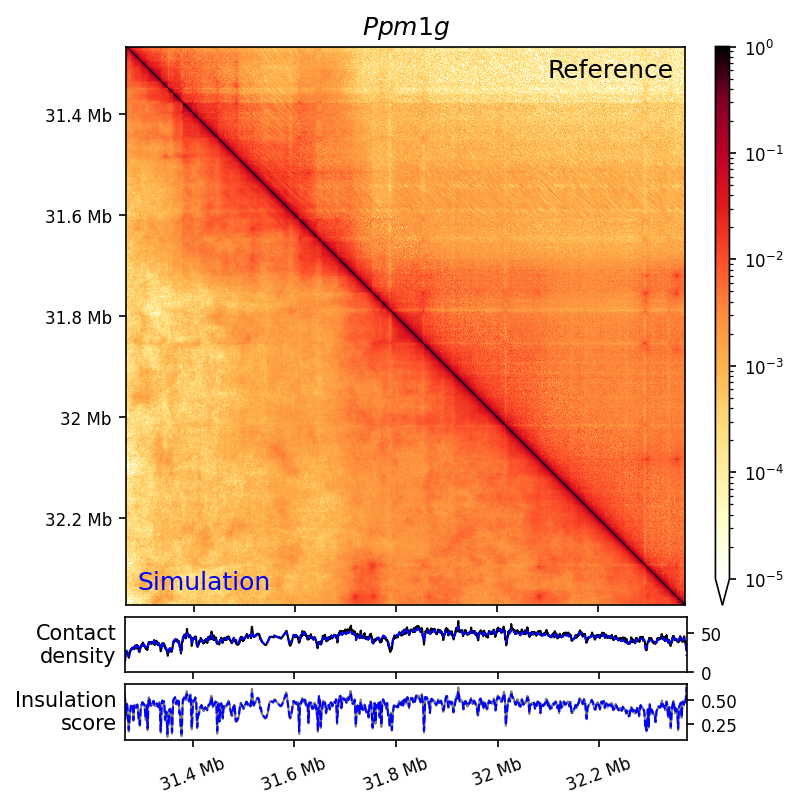

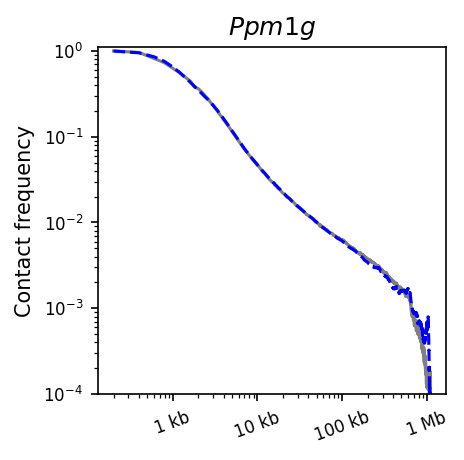

Analyzing ppm1g_ice...


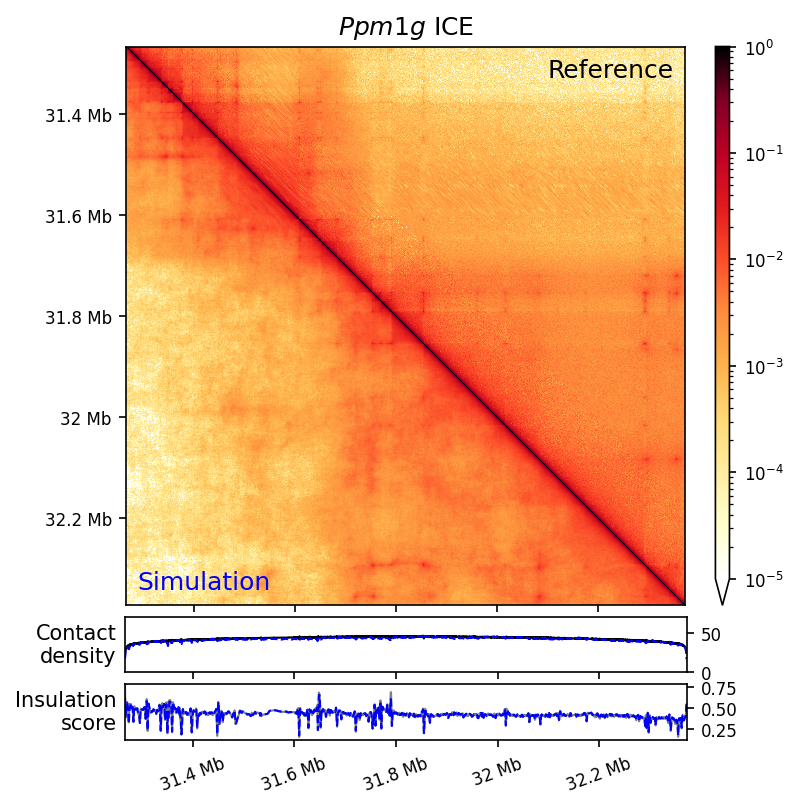

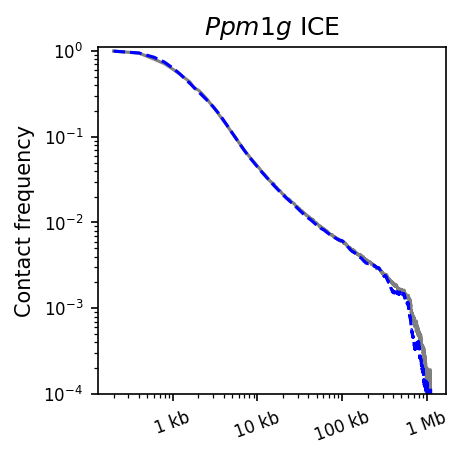

Analyzing ppm1g_rad21_aid...


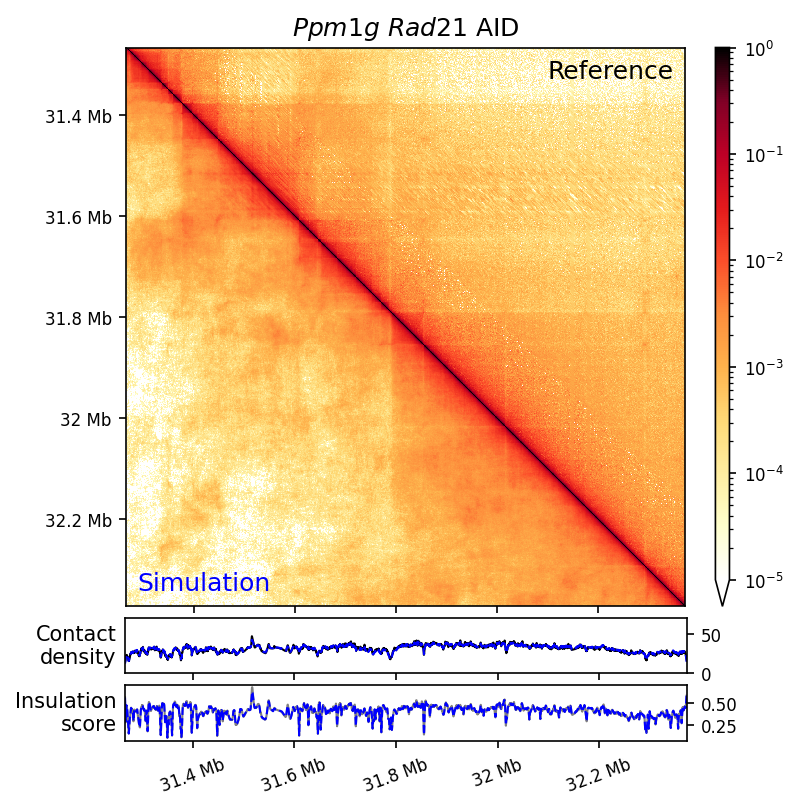

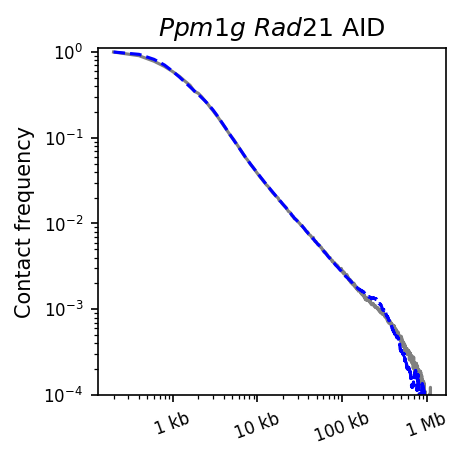

Analyzing sox2...


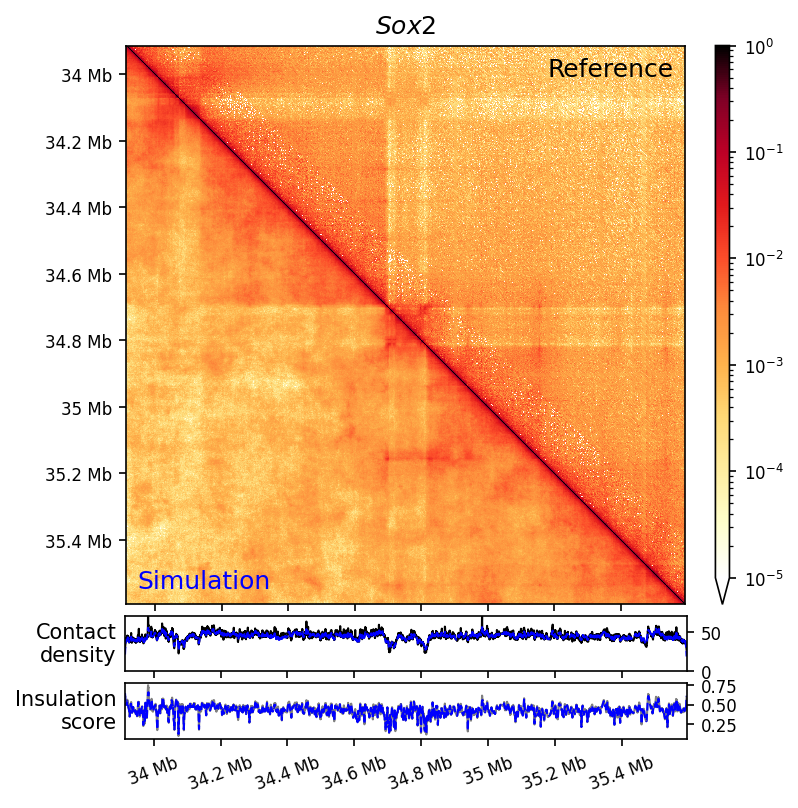

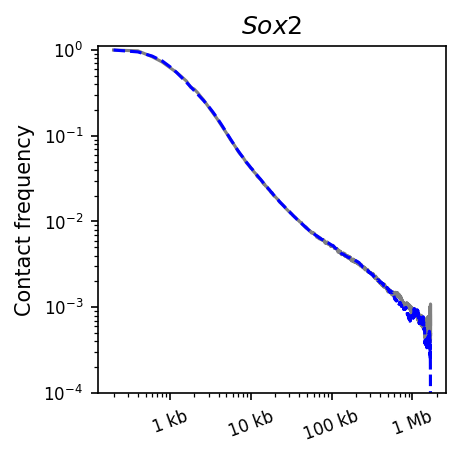

Analyzing fbn2...


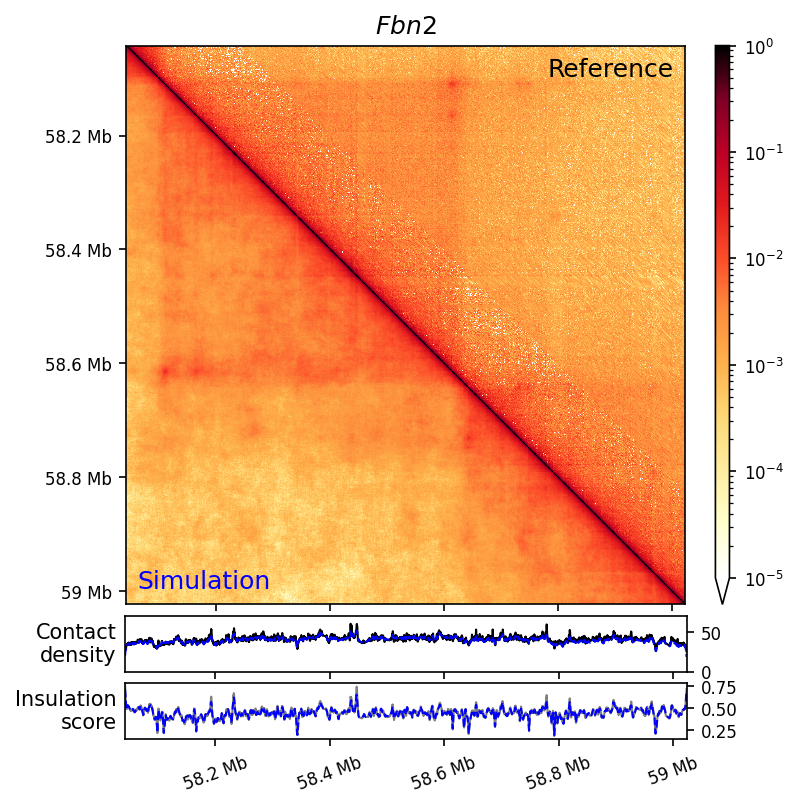

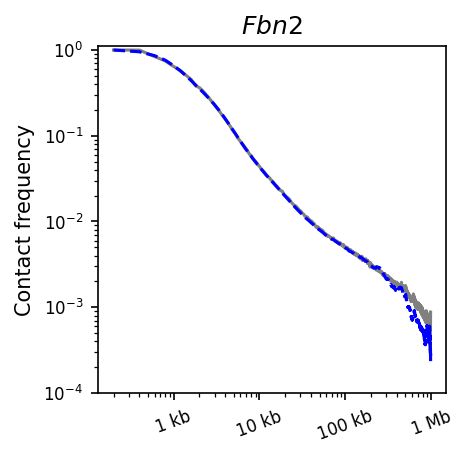

In [4]:
ref_color = 'black'
sim_color = 'blue'

def compare(ref, sim, vmin=1e-5, name=''):
    merged = ContactMap(np.triu(ref.contact_map) + np.tril(sim.contact_map), chrom=chrom, start=start, end=end, resolution=200)
    
    f, ax = plt.subplots(3, 2, figsize=(5.2, 6),
                         gridspec_kw={'height_ratios': [10, 1, 1], 'hspace': 0.05,
                                      'width_ratios':[40, 1], 'wspace': 0.1}, sharex='col')
    ax[0, 0].set_title(name)
    im = merged.plot_contact_map(vmin=vmin, ax=ax[0, 0], colorbar=False)
    plt.colorbar(im, cax=ax[0, 1], extend='min')
    eps = 0.02
    ax[0, 0].text(1-eps, 1-eps, 'Reference', transform=ax[0, 0].transAxes, ha='right', va='top', fontsize=12, color=ref_color)
    ax[0, 0].text(eps, eps, 'Simulation', transform=ax[0, 0].transAxes, ha='left', va='bottom', fontsize=12, color=sim_color)

    ax[1, 0].plot(ref.x(), ref.get_marginal(), c=ref_color, label='Reference', lw=1)
    ax[1, 0].plot(sim.x(), sim.get_marginal(), c=sim_color, label='Simulation', ls='--', lw=1)
    ax[1, 0].set_ylabel('Contact\ndensity', rotation=0, ha='right', va='center')
    ax[1, 0].set_ylim(0, 70)
    ax[1, 0].set_xlim(start, end)
    #ax[1, 0].legend()

    ax[2, 0].plot(ref.x(), _insul_diamond_dense(ref.contact_map, window=10, norm_by_median=False), c='gray', label='Reference', lw=1)
    ax[2, 0].plot(sim.x(), _insul_diamond_dense(sim.contact_map, window=10, norm_by_median=False), c=sim_color, label='Simulation', ls='--', lw=1)
    ax[2, 0].set_ylabel('Insulation\nscore', rotation=0, ha='right', va='center')

    ax[1, 0].yaxis.tick_right()
    ax[2, 0].yaxis.tick_right()
    ax[2, 1].axis('off')
    ax[1, 1].axis('off')
    format_ticks(ax[2, 0], y=False)
    return ax
    

for name, info in prod.items():
    print(f'Analyzing {name}...')
    mei = info['mei']
    chrom, start, end = parse_region(mei.mei.config['region'])
    ref = ContactMap(2*mei.get_reference_contact_map(), chrom=chrom, start=start, end=end, resolution=200)
    sim = ContactMap(2*mei.get_precomputed_contact_map(iteration=info['iteration']), chrom=chrom, start=start, end=end, resolution=200)

    ax = compare(ref, sim, name=stylized_names[name], vmin=1e-5)
    plt.savefig(f'img/convergence_{name}.pdf')
    plt.show()

    f, ax = plt.subplots(figsize=(3, 3))
    ref.plot_distance_average(ax=ax, c='gray', label='Reference')
    sim.plot_distance_average(ax=ax, c=sim_color, label='Simulation', ls='--')
    ax.set_ylim(1e-4, 1.1)
    ax.set_title(stylized_names[name])
    ax.set_ylabel('Contact frequency')
    plt.savefig(f'img/convergence_ps_{name}.pdf')
    plt.show()

Analyzing ppm1g...


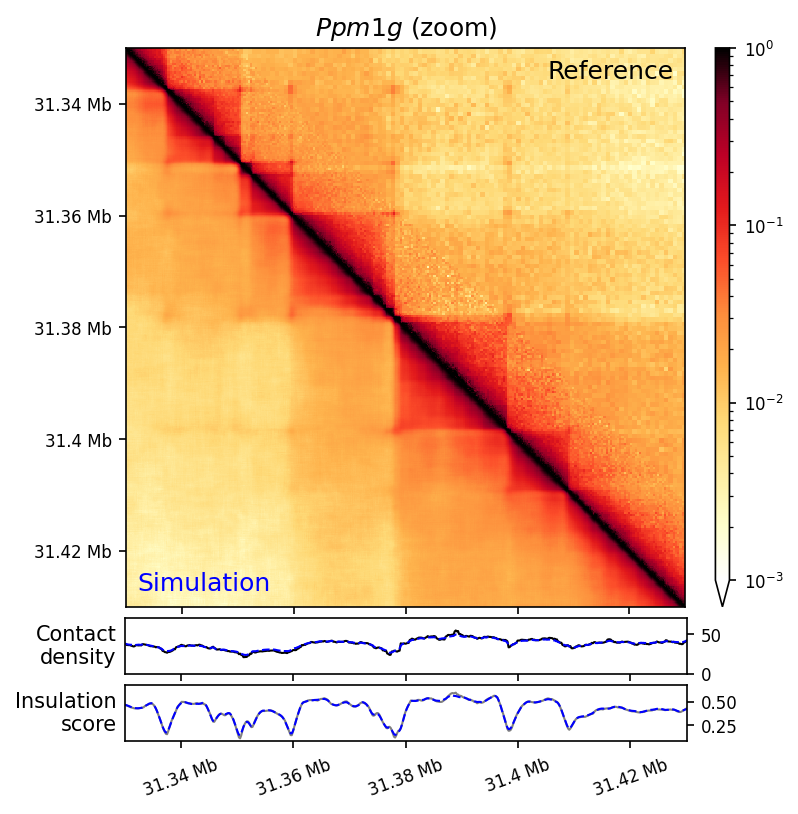

Analyzing sox2...


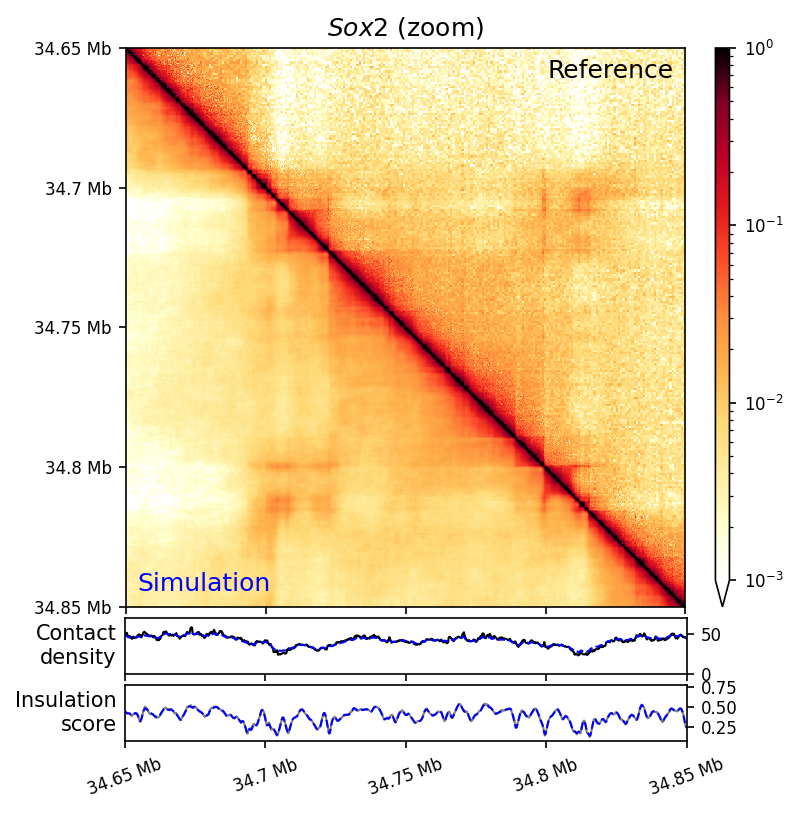

Analyzing sox2...


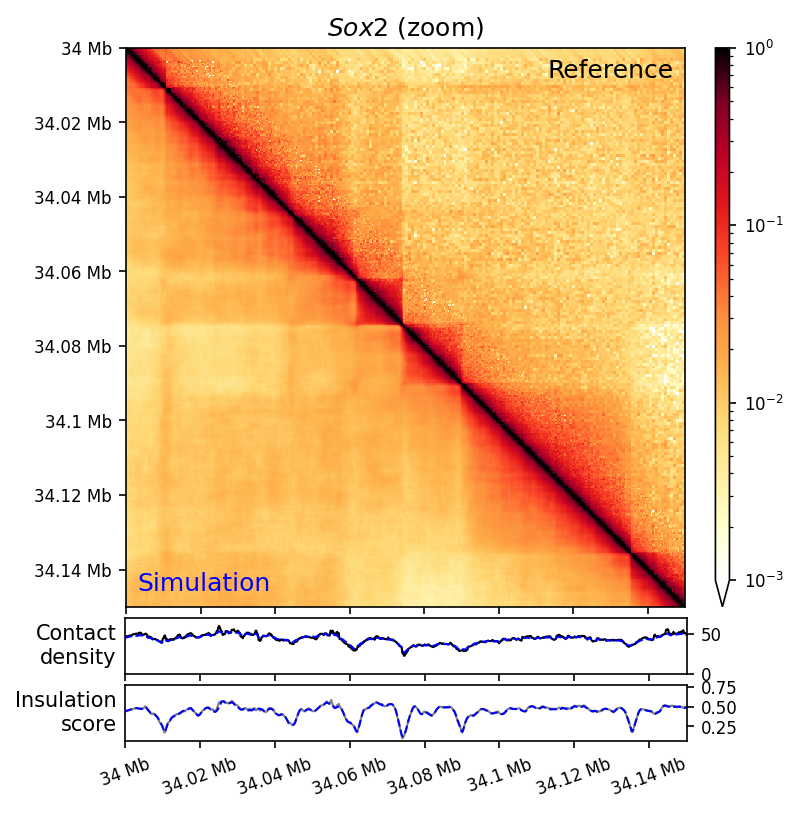

Analyzing klf1...


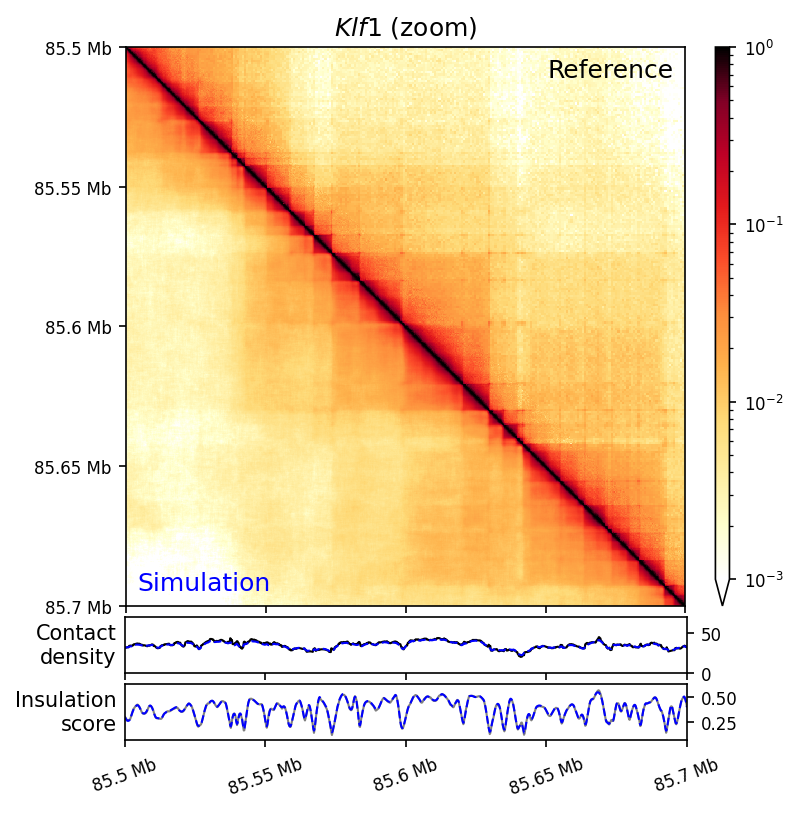

Analyzing ppm1g...


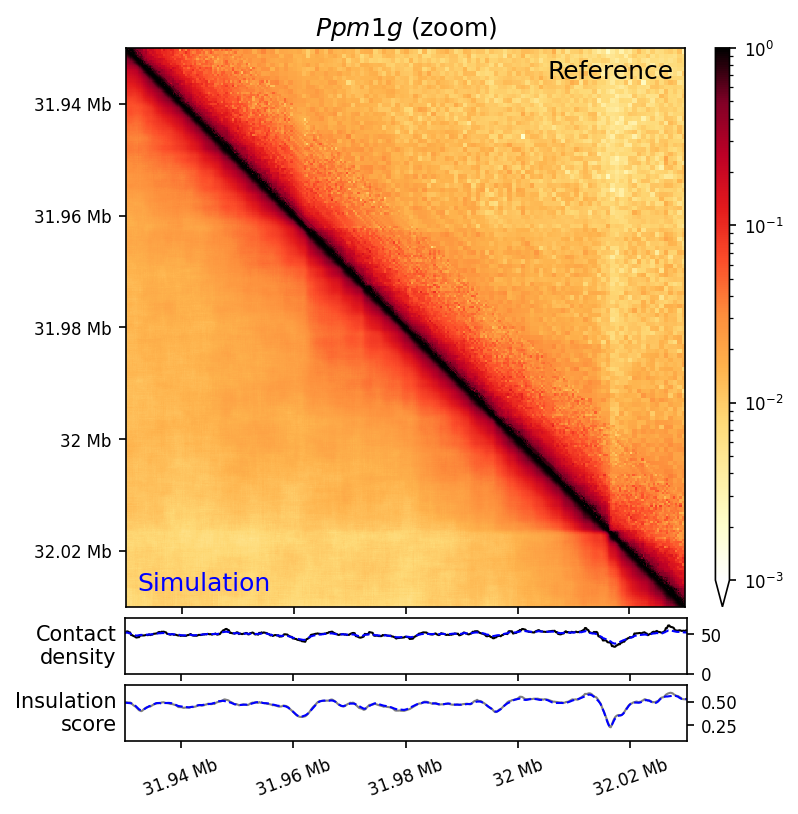

Analyzing ppm1g...


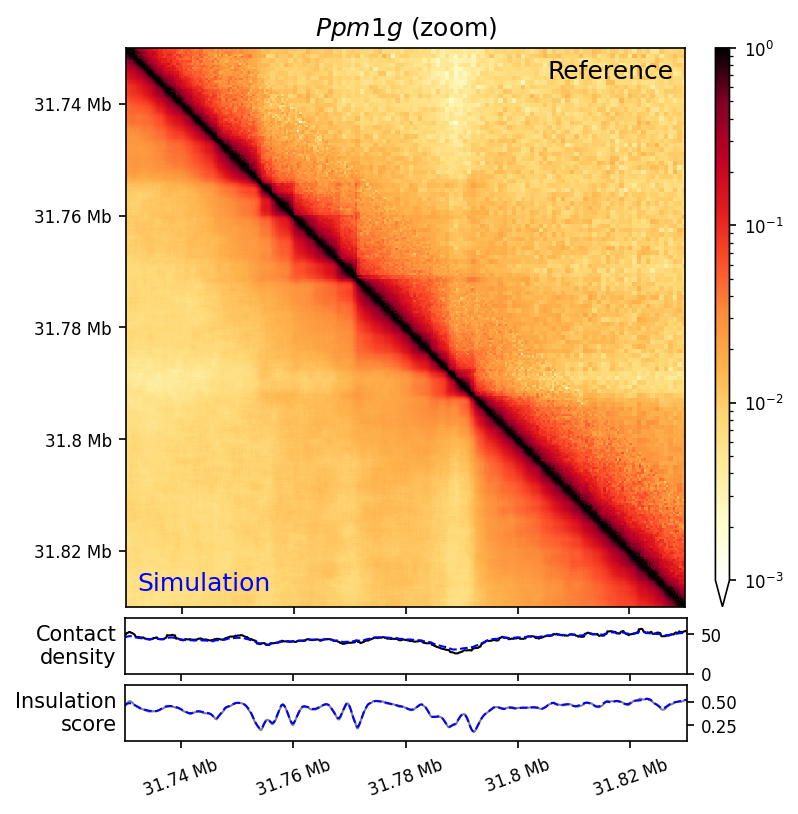

In [5]:
zooms = {'ppm1g zoom': 'chr5:31,330,000-31,430,000',
         'sox2 zoom': 'chr6:34,650,000-34,850,000',
         'sox2 zoom 2': 'chr3:34,000,000-34,150,000',
         'klf1 zoom': 'chr8:85,500,000-85,700,000',
         'ppm1g zoom 2': 'chr5:31,930,000-32,030,000',
         'ppm1g zoom 3': 'chr5:31,730,000-31,830,000',
         }

for zoom_name, zoom_region in zooms.items():
    _, zoom_start, zoom_end = parse_region(zoom_region)
    name = zoom_name.split()[0]
    info = prod[name]
    print(f'Analyzing {name}...')
    mei = info['mei']
    chrom, start, end = parse_region(mei.mei.config['region'])
    ref = ContactMap(2*mei.get_reference_contact_map(), chrom=chrom, start=start, end=end, resolution=200)
    sim = ContactMap(2*mei.get_precomputed_contact_map(iteration=info['iteration']), chrom=chrom, start=start, end=end, resolution=200)

    ax = compare(ref, sim, name=f'{stylized_names[name]} (zoom)', vmin=1e-3)
    ax[0, 0].set_xlim(zoom_start, zoom_end)
    ax[0, 0].set_ylim(zoom_end, zoom_start)
    plt.savefig(f'img/convergence_{zoom_name}.pdf')
    plt.show()